In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import bz2

### Ejercicio 1
#### Count the number of lines in Python for each file

In [3]:
!ls -l

total 1015628
-rw-rw-rw- 1 angelrps angelrps    523313 Jan  8 16:31  01_intro_to_DS_toolkit_inclass.ipynb
-rw-rw-rw- 1 angelrps angelrps     50785 Jan  8 12:52  02-loading_and_saving_data_inclass.ipynb
-rwxrwxrwx 1 angelrps angelrps    173167 Jan  8 10:13  10-11_Python_AmadChall_v19.pptx
-rw-rw-rw- 1 angelrps angelrps    189652 Jan 11 13:59  Amadeus_Challenge_Class.ipynb
-rw-rw-rw- 1 angelrps angelrps     11809 Jan 15 10:46  Amadeus_Challenge_Test.ipynb
-rw-rw-rw- 1 angelrps angelrps 554970628 Jan  9 09:44  bookings.csv.bz2
-rw-rw-rw- 1 angelrps angelrps    535893 Jan 11 09:21  bookings.sample.csv.bz2
-rw-rw-rw- 1 angelrps angelrps     14965 Jan 14 09:21  ch_01-Empty.ipynb
-rw-rw-rw- 1 angelrps angelrps    201405 Jan 14 09:21  ch_02-Empty.ipynb
-rw-rw-rw- 1 angelrps angelrps     40244 Jan 14 09:21  ch_05-empty.ipynb
-rw-rw-rw- 1 angelrps angelrps 483188920 Jan  9 09:44  searches.csv.bz2
-rw-rw-rw- 1 angelrps angelrps     77878 Jan 11 13:33  top_airports.csv
-rwxrwxrwx 1 angelrps angelr

In [4]:
%time
!bzcat bookings.csv.bz2 | wc -l
#result was 100000 11
#time processing 1' 28''

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 25 µs
10000011


In [5]:
%time
!bzcat searches.csv.bz2 | wc -l
#result was 20390198
#time processing 1' 30''

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 25.7 µs
20390198


In [6]:
%time
bookingsfile = bz2.open("./bookings.csv.bz2")
dfbookings = pd.read_csv(bookingsfile, sep='^')
len(dfbookings.index)
#time processing 2' 58''

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 24.1 µs


/home/angelrps/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


10000010

In [7]:
%time
searchesfile = bz2.open("./searches.csv.bz2")
dfsearches = pd.read_csv(searchesfile, sep='^')
len(dfsearches.index)
#time processing 6' 54''

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs


/home/angelrps/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


20390198

### Ejercicio 2
#### Top 10 arrival airports in the world in 2013 (using the bookings file)

- Arrival airport is the column arr_port. It is the IATA code for the airport.
- To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).
- Print the top 10 arrival airports in the standard output, including the number of passengers.

- Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)
- Bonus point: Solve this problem using pandas (instead of any other approach)

In [8]:
#Get 2 columns of interest
dfbookreduced = dfbookings[['arr_port','pax']]
#Group data by arr_port
grouped_bookings = dfbookreduced.groupby('arr_port')
#Sum pax, sort and show the first ten
grouped_bookings.sum().sort_values(by='pax', ascending=False).head(10)

pax
arr_port         
LHR       88809.0
MCO       70930.0
LAX       70530.0
LAS       69630.0
JFK       66270.0
CDG       64490.0
BKK       59460.0
MIA       58150.0
SFO       58000.0
DXB       55590.0

### Ejercicio 3
#### Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 
Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

Bonus point: Solving this problem using pandas (instead of any other approach)


In [9]:
#Take the 2 columns of interest
dfs = dfsearches[['Date','Destination']]
#remove 'day' from Date so it can be sorted by month
dfs["Date"] = dfs['Date'].str[:-3]

/home/angelrps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
#Retrieve Malaga values
#Retrieve Madrid values
#Retrieve Barcelona values
dfsAGP = dfs.loc[dfs['Destination'] == 'AGP']
dfsMAD = dfs.loc[dfs['Destination'] == 'MAD']
dfsBCN = dfs.loc[dfs['Destination'] == 'BCN']

# .value_counts() returns number of unique values for a particular column
dfsAGPcount = dfsAGP['Date'].value_counts()
dfsMADcount = dfsMAD['Date'].value_counts()
dfsBCNcount = dfsBCN['Date'].value_counts()

In [11]:
#Create cleaned and sorted Malaga data frame
MADdata = pd.DataFrame({'DateCount' : dfsMADcount, 'Destination' : 'MAD'})
MADdata.sort_index(inplace=True)
#Create cleaned and sorted Madrid data frame
AGPdata = pd.DataFrame({'DateCount' : dfsAGPcount, 'Destination' : 'AGP'})
AGPdata.sort_index(inplace=True)
#Create cleaned and sorted Barcelona data frame
BCNdata = pd.DataFrame({'DateCount' : dfsBCNcount, 'Destination' : 'BCN'})
BCNdata.sort_index(inplace=True)

#Create final data frame from other 3 data frames
FINALdata = pd.concat([AGPdata['DateCount'], MADdata['DateCount'], BCNdata['DateCount']], axis=1, keys=['AGP', 'MAD', 'BCN'])
FINALdata

AGP    MAD    BCN
2013-01   9633  24258  29469
2013-02   8379  22800  28329
2013-03  10659  24681  30552
2013-04   8265  25251  31236
2013-05  10830  26334  28728
2013-06   7923  22800  26505
2013-07   8892  22971  29241
2013-08   7866  21831  27075
2013-09   8151  21147  23427
2013-10   6499  22294  20276
2013-11   6384  20272  19824
2013-12   3696  14504  15400

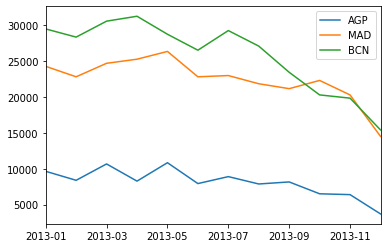

In [12]:
#Plot final data
FINALdata.plot()

### Ejercicio 4
#### Match searches with bookings

- For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match. 
- For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. 
- Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

I assume that searches ending in booking where done the same day. Thus I will find searches which Data, Origin and Destination match with booking Date, Origin and Destination

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [14]:
dfbookings.sample(5)

act_date             source  pos_ctry  \
9685369  2013-06-05 00:00:00  1S      US         
7601688  2013-01-03 00:00:00  1A      GB         
9089871  2013-03-13 00:00:00  1A      ES         
9487981  2013-05-06 00:00:00  1S      CO         
5694993  2013-10-08 00:00:00  1G      AT         

                                 pos_iata                         pos_oid    \
9685369  fdf37bc10727f089c914a5f69dd57fde  5163e9b2a99cf3076eb7c58e6683633b   
7601688  b2b43e3a5477484b5fbf361b52182a17  d1b80a3dca253a3816073469f2cfe6be   
9089871  f7a5097c4d76e3f1109b22fd5e82af64  e405c0b688a81e623bf35c85e8ade5cf   
9487981  c47d08e0aae7a7c000103ab56070d62a  02706affbb2a447f92bcf978b133a6ba   
5694993  0c07eb4710fa2fce153385b54cd02541  50570cce0154556af00b60c51dd64bde   

                           rloc            cre_date            duration  \
9685369  1a8783a41a89821da8fb85be1de16ed5  2013-06-05 00:00:00     4121   
7601688  cbb9cb94c81892e9fc7a01cf53bc9f28  2013-01-03 00:00:00    48494   
9089871  92a12b1c753372d56a9853bb08dbc995  2013-02-22 00:00:00      577   
9487981  14ed7d8f56d4e7bb1eff39f7f3831934  2013-05-06 00:00:00    27326   
5694993  03abb26692d28f648e109a9d1d378859  2013-10-07 00:00:00     3251   

        distance  dep_port  dep_city  dep_ctry  arr_port  arr_city  arr_ctry  \
9685369        0  BOS       BOS       US        DUB       DUB       IE         
7601688        0  DOH       DOH       QA        LAS       LAS       US         
9089871        0  PMI       PMI       ES        IBZ       IBZ       ES         
9487981        0  CUC       CUC       CO        CLO       CLO       CO         
5694993        0  VIE       VIE       AT        FRA       FRA       DE         

         lst_port  lst_city  lst_ctry  brd_port  brd_city  brd_ctry  off_port  \
9685369  BOS       BOS       US        DUB       DUB       IE        BOS        
7601688  DOH       DOH       QA        MAN       MAN       GB        LAS        
9089871  PMI       PMI       ES        IBZ       IBZ       ES        PMI        
9487981  CUC       CUC       CO        CLO       CLO       CO        CUC        
5694993  VIE       VIE       AT        VIE       VIE       AT        FRA        

         off_city  off_ctry  mkt_port  mkt_city  mkt_ctry intl  \
9685369  BOS       US        BOSDUB    BOSDUB    IEUS        1   
7601688  LAS       US        LASMAN    LASMAN    GBUS        1   
9089871  PMI       ES        IBZPMI    IBZPMI    ESES        0   
9487981  CUC       CO        CLOCUC    CLOCUC    COCO        0   
5694993  FRA       DE        FRAVIE    FRAVIE    ATDE        1   

         route           carrier  bkg_class  cab_class  brd_time             \
9685369     DUBBOS            OS  D          C          2013-08-02 16:15:00   
7601688  MANLAS               GD  N          Y          2013-06-02 12:35:00   
9089871     IBZPMI            SL  B          Y          2013-03-20 17:20:00   
9487981  CLOBOGCUC            VK  O          Y          2013-06-05 09:05:00   
5694993  VIEFRA               YD  V          Y          2013-10-22 10:50:00   

         off_time             pax    year  month  oid        
9685369  2013-08-02 17:41:48  1.0  2013.0    6.0  NULL       
7601688  2013-06-02 14:59:05  1.0  2013.0    1.0  LONOP38AW  
9089871  2013-03-20 18:17:49  1.0  2013.0    3.0  MADEL2239  
9487981  2013-06-05 12:26:20  1.0  2013.0    5.0  NULL       
5694993  2013-10-22 12:21:50  1.0  2013.0   10.0  NULL

In [15]:
dfsearches.sample(5)

Date      Time TxnCode                          OfficeID  \
14571296  2013-07-31  20:49:02     MPT  ad5e8547187c6456a514c30f9bfc09ef   
11348752  2013-08-08  03:30:26     MPT  54f6f48446ebb52e3d8a1936d8dbf8bc   
7530309   2013-12-17  12:17:07     MPT  367937ca733d0d562ca6b751274304c8   
5695075   2013-11-06  09:13:10     MPT  9680a1906bab38d04b27e0028d116325   
4419335   2013-04-22  07:26:38     MPT  d9de8ae598557f9f3e3de9697e27e7aa   

         Country Origin Destination  RoundTrip  NbSegments Seg1Departure  \
14571296      US    NYC         TLV        1.0         2.0           NYC   
11348752      UA    YTM         YTO        0.0         1.0           YTM   
7530309       GB    LON         NYC        0.0         1.0           LON   
5695075       DE    MEL         MUC        1.0         2.0           MEL   
4419335       CH    BSL         NCE        1.0         2.0           BSL   

         Seg1Arrival    Seg1Date Seg1Carrier Seg1BookingCode Seg2Departure  \
14571296         TLV  2013-12-18          WD             NaN           TLV   
11348752         YTO  2014-05-10         NaN             NaN           NaN   
7530309          NYC  2013-12-25         NaN             NaN           NaN   
5695075          MUC  2013-12-16         NaN             NaN           MUC   
4419335          NCE  2013-06-28          XR             NaN           NCE   

         Seg2Arrival    Seg2Date Seg2Carrier Seg2BookingCode Seg3Departure  \
14571296         NYC  2013-12-31          WD             NaN           NaN   
11348752         NaN         NaN         NaN             NaN           NaN   
7530309          NaN         NaN         NaN             NaN           NaN   
5695075          MEL  2014-01-08         NaN             NaN           NaN   
4419335          BSL  2013-06-30          XR             NaN           NaN   

         Seg3Arrival Seg3Date Seg3Carrier Seg3BookingCode Seg4Departure  \
14571296         NaN      NaN         NaN             NaN           NaN   
11348752         NaN      NaN         NaN             NaN           NaN   
7530309          NaN      NaN         NaN             NaN           NaN   
5695075          NaN      NaN         NaN             NaN           NaN   
4419335          NaN      NaN         NaN             NaN           NaN   

         Seg4Arrival Seg4Date Seg4Carrier Seg4BookingCode Seg5Departure  \
14571296         NaN      NaN         NaN             NaN           NaN   
11348752         NaN      NaN         NaN             NaN           NaN   
7530309          NaN      NaN         NaN             NaN           NaN   
5695075          NaN      NaN         NaN             NaN           NaN   
4419335          NaN      NaN         NaN             NaN           NaN   

         Seg5Arrival Seg5Date Seg5Carrier Seg5BookingCode Seg6Departure  \
14571296         NaN      NaN         NaN             NaN           NaN   
11348752         NaN      NaN         NaN             NaN           NaN   
7530309          NaN      NaN         NaN             NaN           NaN   
5695075          NaN      NaN         NaN             NaN           NaN   
4419335          NaN      NaN         NaN             NaN           NaN   

         Seg6Arrival Seg6Date Seg6Carrier Seg6BookingCode    From  \
14571296         NaN      NaN         NaN             NaN  1ASIWS   
11348752         NaN      NaN         NaN             NaN  1ASIWS   
7530309          NaN      NaN         NaN             NaN  1ASIWS   
5695075          NaN      NaN         NaN             NaN  1ASIWS   
4419335          NaN      NaN         NaN             NaN  1ASIWS   

         IsPublishedForNeg IsFromInternet IsFromVista  \
14571296                 0              0           0   
11348752                 0              0           0   
7530309                  0              0           0   
5695075                  0              0           0   
4419335                  0              0           0   

                                TerminalID InternetOf

In [16]:
#Column names have lots of white spaces. I remove them with str.strip()
dfbookings.columns = dfbookings.columns.str.strip()
dfbookings.columns

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')

In [17]:
#bookings: cre_date, dep_port, arr_port
#searches: Date, Origin, Destination
#groupby date, origin, destination
#sum
#sort by date

In [43]:
#CREATE SMALLER SAMPLES TO WORK WITH
dfbookings4 = dfbookings[['cre_date', 'dep_port', 'arr_port', 'year']]
#cre_date has useless time info so I remove it
dfbookings4['cre_date'] = dfbookings4['cre_date'].str[:10]

dfbookingsSample = dfbookings4.sample(10000)
dfbookingsSample

/home/angelrps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


cre_date  dep_port  arr_port    year
7083973  2013-05-13  FCO       CMB       2013.0
3467544  2013-10-15  SBN       SAN       2013.0
109097   2013-03-24  RUH       JED       2013.0
351393   2013-01-30  GPT       IAH       2013.0
1476258  2013-10-24  YYZ       MCO       2013.0
...             ...       ...       ...     ...
8112721  2013-03-01  CBR       CEI       2013.0
5203843  2013-03-31  DOH       MUC       2013.0
3035717  2013-03-27  MNL       TPE       2013.0
4622199  2013-07-09  BAH       YYZ       2013.0
6919028  2013-04-13  LED       DME       2013.0

[10000 rows x 4 columns]

In [42]:
dfbookings4.sort_values(by='cre_date')

cre_date  dep_port  arr_port    year
6674625  2011-03-01  LIS       DKR       2013.0
1674613  2011-03-01  CDG       WNZ       2013.0
1674614  2011-03-01  CDG       WNZ       2013.0
1674615  2011-03-01  LIS       DKR       2013.0
1674616  2011-03-01  LIS       DKR       2013.0
...             ...       ...       ...     ...
1512381  2013-12-31  DTW       SJC       2013.0
1512380  2013-12-31  HBE       GVA       2013.0
1512387  2013-12-31  BHX       FOC       2013.0
3893602  2013-12-31  CMN       JFK       2013.0
5000007          60  JP        SG           NaN

[10000010 rows x 4 columns]

In [19]:
#CREATE SMALLER SAMPLES TO WORK WITH
dfsearches4 = dfsearches[['Date', 'Origin', 'Destination']]
dfsearchesSample = dfsearches4.sample(10000)
dfsearchesSample

Date Origin Destination
19717332  2013-11-28    BKK         AUH
8178933   2013-10-08    CDG         LYS
777187    2013-03-01    IND         RSW
9943694   2013-09-08    LAS         MNL
11945136  2013-04-08    LON         TLL
16294711  2013-05-20    EDI         NYC
20231485  2013-05-08    ORH         PAR
13552062  2013-09-26    OSL         DUS
8367718   2013-04-21    JFK         KRT
1960245   2013-06-15    ROV         DME
13103599  2013-06-29    MAH         BCN
2364559   2013-07-30    DSA         ALC
14281867  2013-10-08    PVG         PPS
16799490  2013-10-13    MAD         TFN
7087257   2013-09-24    DMM         JED
13658894  2013-01-17    BER         CAG
3257612   2013-01-27    SFO         RIO
16926006  2013-02-22    STO         FAO
3619597   2013-01-30    ZRH         EDI
3426104   2013-07-15    MUC         FUE
19318398  2013-10-19    DEL         CHI
17373367  2013-05-22    MAD         GVA
17653034  2013-03-03    ORD         SJO
30757     2013-01-31    JFK         BLR
10998487  2013-08-17    BCN         MUC
13617677  2013-12-01    HEL         KTT
13644126  2013-01-02    BCN         ZRH
946763    2013-08-17    LEI         PMI
1098558   2013-01-22    MUC         DUS
6556033   2013-04-04    IST         TCI
17991162  2013-02-10    WEI         HID
4755996   2013-03-30    JFK         ANC
1054408   2013-12-03    SFO         SLP
1651248   2013-08-04    MOW         TLL
8433320   2013-06-26    MAN         ANR
159229    2013-06-09    SKG         LCA
1306211   2013-08-18    LON         BRI
19181550  2013-06-04    DUS         MUC
12243427  2013-02-07    DME         RMI
19556992  2013-06-20    ATL         CDG
4692554   2013-01-26    HEL         LON
16099881  2013-10-31    LPP         VIE
15137329  2013-03-01    PHL         LHR
950876    2013-08-21    CLO         CTG
12453124  2013-09-04    LIS         LED
4928789   2013-09-19    BKK         LAX
12507436  2013-10-29    HAJ         PAR
8982678   2013-01-08    TXL         DXB
7430432   2013-09-08    MAD         BRU
3115363   2013-09-01    NYC         YVR
15020376  2013-10-29    STR         TXL
11161558  2013-02-02    LHR         DUB
20009759  2013-09-22    VKO         DBV
9307011   2013-11-28    RMI         MOW
2437799   2013-10-11    PHX         YVR
6394642   2013-10-19    SFO         BLV
5017078   2013-12-17    BPN         SDY
5153791   2013-05-08    JFK         PUJ
3779840   2013-07-09    VIE         ALB
19845649  2013-04-11    JED         RUH
16273636  2013-04-29    BTR         PVG
3944556   2013-12-21    YYZ         LGA
17925499  2013-12-01    PER         LHR
4646155   2013-12-05    YVR         YHZ
17852786  2013-09-19    MPL         DOL
13881687  2013-08-28    KUF         PEZ
15265936  2013-07-07    YQG         DUS
15824529  2013-01-29    ADL         SYD
17951020  2013-01-01    MUC         BKK
177207    2013-06-27    FRA         EBL
16254893  2013-04-10    SFO         TCB
4776601   2013-04-20    FOR         LIS
12175515  2013-11-25    SAN         EWR
19346802  2013-11-16    EWR         FLL
12097140  2013-09-07    TYO         MOW
10974947  2013-07-24    PVG         HAN
6649807   2013-07-07    BER         LIS
9974384   2013-10-09    FRU         OSS
18956473  2013-10-16    SHA         TSA
17360408  2013-05-09    NYC         CAN
18381326  2013-03-14    ATL         MSP
4993220   2013-11-23    MAD         BOM
18221942  2013-09-29    PDX         BKK
19652028  2013-09-23    LUX         MAD
16428283  2013-10-01    TLS         BKK
10658902  2013-09-05    MCI         PDX
18895193  2013-08-15    WAS         UIO
10011233  2013-11-15    YYZ         FRA
13359580  2013-03-18    UIO         BCN
13423110  2013-05-20    SJO         TXL
14912861  2013-07-13    PAR         RAK
10385325  2013-11-30    OAK         ABQ
2646295   2013-05-14    MOW         WAS
19684335  2013-10-26    CHI         MCO
6718969   2013-09-14    LCY         FRA
11671099  2013-07-02    PTP         PAR
851680    2013-05-14    DUS         ZRH
3141193   2013-09-27    SEA         PAR
16527051  2013-01-13    IND         DEL
17591585  2013-0

In [20]:
#sort bookings
dfbookingsSample = dfbookingsSample.sort_values(by=['cre_date', 'dep_port', 'arr_port'])
dfbookingsSample

cre_date  dep_port  arr_port
8015413  2011-10-28  LDB       BNE     
8282933  2012-03-07  HBE       JFK     
1124942  2012-03-23  DME       TRV     
4213418  2012-04-04  BNE       MEL     
7996037  2012-04-23  ACC       DAR     
1483305  2012-04-25  GRU       SYD     
5031780  2012-04-26  TXL       LAD     
3563809  2012-04-30  DUB       SYD     
8388714  2012-05-02  MUC       MNL     
6069834  2012-05-03  LGW       IST     
1156989  2012-05-23  ZAG       HKG     
2485461  2012-05-25  ULN       ICN     
9326821  2012-05-28  IAD       SGN     
9022571  2012-05-29  LAX       AYQ     
3053278  2012-05-30  SFO       PEK     
6252428  2012-05-30  YYC       DEL     
9024148  2012-06-04  MES       WLG     
7604659  2012-06-06  ITH       POS     
7143138  2012-06-08  MEL       EZE     
6079734  2012-06-17  SYD       DEL     
1253974  2012-06-19  LHR       GOT     
8012838  2012-06-19  NRT       CHA     
296756   2012-06-29  FRA       NCE     
4213843  2012-07-06  FRA       LHR     
5005314  2012-07-08  HEL       BJV     
2007278  2012-07-11  BNE       FRA     
1182582  2012-07-12  LGW       LAS     
856301   2012-07-13  LHR       AQP     
8353472  2012-07-16  ATL       SJO     
6188801  2012-07-23  DUS       TFS     
1363482  2012-07-23  LHR       MLE     
1737659  2012-07-23  TXL       YUL     
2826692  2012-07-27  REC       TRN     
6289098  2012-07-30  KUL       BCN     
4270590  2012-07-31  AMS       MAD     
6288444  2012-08-03  ORD       BKK     
3682668  2012-08-06  CCU       JFK     
7390063  2012-08-06  YYZ       LOS     
331640   2012-08-08  FRA       FAO     
7326712  2012-08-09  EZE       ADZ     
3107448  2012-08-09  MDE       CDG     
5396285  2012-08-09  MNL       PRG     
5838161  2012-08-09  SYR       FLR     
6437403  2012-08-10  BDL       TUS     
7180622  2012-08-14  OSL       SXB     
6167355  2012-08-26  JED       MED     
3908954  2012-08-26  VKO       BER     
4124867  2012-08-27  PER       SGN     
8858182  2012-08-29  ICN       ATW     
3346081  2012-08-29  VCE       OPO     
1079664  2012-08-30  YOW       DKR     
4069125  2012-08-31  HAS       LHE     
1008117  2012-08-31  LGW       LAS     
4156666  2012-08-31  MAD       SDQ     
8591980  2012-08-31  TPA       EWR     
9106419  2012-09-03  AMS       TIA     
4142529  2012-09-04  YYC       MNL     
31161    2012-09-05  GOT       FCO     
5430139  2012-09-08  CCS       SGN     
6680710  2012-09-08  LAS       MBJ     
555371   2012-09-11  MEL       HYD     
6435668  2012-09-11  RUH       MXP     
6560052  2012-09-13  MED       DEL     
2428887  2012-09-14  NTE       FDF     
7628615  2012-09-17  MEL       NCE     
2258626  2012-09-17  RDU       SGN     
9155919  2012-09-19  BOG       MUC     
2078115  2012-09-24  AKL       BNE     
362687   2012-09-25  GOT       TAB     
5437086  2012-09-26  DFW       LHR     
5096032  2012-09-26  FRA       GRU     
7324558  2012-09-26  LHE       JED     
7158439  2012-09-26  MAD       BCN     
2857127  2012-09-26  SAT       LAS     
1846466  2012-09-27  LHE       JED     
7025931  2012-09-27  TRN       MLE     
2243329  2012-09-28  LFW       JFK     
2238498  2012-09-28  ORD       LAX     
7337895  2012-09-29  JED       DAC     
3208902  2012-09-30  SFO       PVG     
6102092  2012-10-01  CAK       MCO     
6586150  2012-10-01  FCO       DPS     
7360899  2012-10-01  LHE       RUH     
5483307  2012-10-02  CPH       IAD     
3026503  2012-10-02  LHR       DXB     
5300639  2012-10-04  EWR       RTM     
5060419  2012-10-04  ISB       JED     
8060413  2012-10-04  LHE       JED     
8810054  2012-10-04  RUN       MRU     
2810041  2012-10-04  RUN       MRU     
3221017  2012-10-05  AEP       USH     
8187298  2012-10-05  ATL       NCE     
8187297  2012-10-05  ATL       NCE     
1664630  2012-10-05  IAD       HYD     
9208311  2012-10-06  PHX       AMM     
3188736  2012-10-08  AMS       GVA     
6266595  2012-10-08  IAD       JTR     
8603048  2012-10-08  SIN       BOM     
5937721  2012-10-09  CGK       FRA     
5078067  20

In [22]:
dfsearchesSample = dfsearchesSample.sort_values(by=['Date', 'Origin', 'Destination'])
dfsearchesSample

Date Origin Destination
2513390   2013-01-01    AUA         NYC
12924756  2013-01-01    BER         LED
6103258   2013-01-01    BUD         TYO
10052437  2013-01-01    CEB         FRA
18669154  2013-01-01    CGN         PMI
17951299  2013-01-01    FLR         LON
17591585  2013-01-01    FRA         HKT
9334620   2013-01-01    FRA         NYC
5744727   2013-01-01    FRA         PMI
10053132  2013-01-01    GOI         IXC
8616484   2013-01-01    HAM         STO
8616815   2013-01-01    KUL         FCO
4308234   2013-01-01    LAX         BJX
1436804   2013-01-01    LON         CAI
11129761  2013-01-01    MEL         SYD
3590366   2013-01-01    MIL         DEL
18668843  2013-01-01    MOW         VVO
17951020  2013-01-01    MUC         BKK
10412145  2013-01-01    OSL         SVG
16874010  2013-01-01    SFO         LHR
7898646   2013-01-01    SJO         JFK
2872909   2013-01-01    SPC         LPA
734       2013-01-01    TPA         LAS
2872683   2013-01-01    VIE         SEZ
1436893   2013-01-01    WAS         BUE
16515178  2013-01-01    WAW         ROM
10053026  2013-01-01    YVR         MNL
2872947   2013-01-01    YYZ         BKK
5386087   2013-01-01    YYZ         HKG
13283349  2013-01-01    ZRH         BUD
2873750   2013-01-02    AGP         BCN
14361366  2013-01-02    AUH         CDG
13644126  2013-01-02    BCN         ZRH
15079585  2013-01-02    BDL         LAX
10053567  2013-01-02    BKK         RSE
16874373  2013-01-02    BOM         IEV
12208040  2013-01-02    CLT         FPO
5027257   2013-01-02    CPH         AMM
14720309  2013-01-02    CPH         RTM
3950672   2013-01-02    CTA         FRA
8258648   2013-01-02    DCA         DUB
2514550   2013-01-02    DFW         JFK
11489571  2013-01-02    DMM         JED
17951999  2013-01-02    FOR         OPO
19747164  2013-01-02    GRU         FOR
4309867   2013-01-02    HOB         ROM
719303    2013-01-02    ICN         CEB
15079897  2013-01-02    JTR         ATH
13284505  2013-01-02    KIX         GMP
19746552  2013-01-02    LAX         SJD
12925964  2013-01-02    LRT         MXP
17592664  2013-01-02    MAD         DKR
2514216   2013-01-02    MAN         LAS
5745848   2013-01-02    MCO         FRA
11489703  2013-01-02    MEX         LAX
17592777  2013-01-02    MOW         SIP
7899824   2013-01-02    MUC         TOS
9694398   2013-01-02    ODE         BJZ
1437169   2013-01-02    PAR         NOS
12566946  2013-01-02    PMI         GRZ
11130845  2013-01-02    PRG         KUL
2873296   2013-01-02    ROM         LON
2873142   2013-01-02    ROM         SYD
15797536  2013-01-02    SAN         SEL
15079453  2013-01-02    SDF         LAS
3232451   2013-01-02    STR         KUO
11848505  2013-01-02    TCI         TSR
5027956   2013-01-02    VIE         AMS
19028790  2013-01-02    VLI         AKL
14362204  2013-01-02    WAS         MIA
12925407  2013-01-02    YFA         WAS
19746972  2013-01-02    YLW         YYZ
14361569  2013-01-02    YVR         YXS
6822392   2013-01-02    YYZ         LAX
3233663   2013-01-03    ANC         HRL
8618158   2013-01-03    CPH         BKK
10413223  2013-01-03    DUS         DXB
19389259  2013-01-03    FRA         PTP
9695501   2013-01-03    HKG         ATH
10413215  2013-01-03    IXB         BOM
15439388  2013-01-03    LED         KRR
1438605   2013-01-03    LED         PEK
6823483   2013-01-03    LGW         DUB
11850174  2013-01-03    NYC         MIA
6105202   2013-01-03    NYC         MSY
19389103  2013-01-03    PAR         MIL
720404    2013-01-03    PAR         SPU
1797373   2013-01-03    RST         OAX
17952595  2013-01-03    SAO         JDF
12568026  2013-01-03    SFO         ATH
9337069   2013-01-03    UDI         MCZ
15440048  2013-01-03    YYJ         YVR
1798255   2013-01-04    BHX         ALC
14363520  2013-01-04    BKK         DXB
10055299  2013-01-04    BRE         DTW
17953972  2013-01-04    BUH         NYC
6106468   2013-01-04    CDG         RUN
7183825   2013-01-04    CPH         MIA
16517668  2013-01-04    DMM         CAI
17235494  2013-0